In [44]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = matplotlib.cm.get_cmap('Spectral')

import numpy as np

from sklearn.datasets import make_moons, make_hastie_10_2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [45]:
## Funciones útiles

def print_results(clfrgr):
    print('#####')
    print('{}.'.format(type(clfrgr).__name__))
                       
    train_score = clfrgr.score(X_train, y_train)
    test_score = clfrgr.score(X_test, y_test)
    print('Train score: ', train_score)
    print('Test score: ', test_score)

def print_results_boost(clfrgr):
    print('#####')
    print('{} con {} estimadores de tipo {}, con max_depth={}.'.format(type(clfrgr).__name__,
                                                                       clfrgr.n_estimators, 
                                                                       type(clfrgr.base_estimator).__name__,
                                                                       clfrgr.base_estimator.max_depth))
    train_score = clfrgr.score(X_train, y_train)
    test_score = clfrgr.score(X_test, y_test)
    print('Train score: ', train_score)
    print('Test score: ', test_score)

    return train_score, test_score

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    ax = plt.gca()
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "o", color=cmap(0), alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "yo", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Bagging

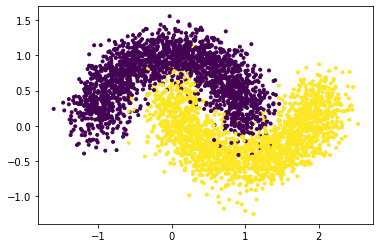

In [46]:
X, y = make_moons(5000, shuffle=True, noise=0.2)
size_train = int(0.8 * len(X))
X_train, X_test = X[:size_train], X[size_train:]
y_train, y_test = y[:size_train], y[size_train:]

plt.scatter(*X_train.T, c=y_train, marker='.')
#plt.scatter(*X_test.T, c=y_test, marker='^')

#####
DecisionTreeClassifier.
Train score:  0.99725
Test score:  0.95


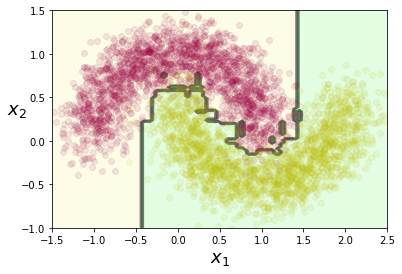

In [47]:
dt = DecisionTreeClassifier(max_depth=12, random_state=107)
dt = dt.fit(X_train, y_train)

# svm_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
#                            ('svc', SVC(kernel='poly'))])
# svm_pipe = svm_pipe.fit(X_train, y_train)

plot_decision_boundary(dt, X_train, y_train, contour=True, alpha=0.1)
print_results(dt)

In [50]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(DecisionTreeClassifier(max_depth=12, random_state=107), n_estimators=500, n_jobs=-1, 
                        oob_score=True, max_samples=1000, bootstrap=True)
clf = clf.fit(X_train, y_train)

In [51]:
print(clf.oob_decision_function_.shape)
print(clf.oob_score_)
print(clf.oob_decision_function_[:5])

(4000, 2)
0.97675
[[8.41042893e-05 9.99915896e-01]
 [1.00000000e+00 0.00000000e+00]
 [1.58522939e-02 9.84147706e-01]
 [8.46674877e-01 1.53325123e-01]
 [8.77577320e-01 1.22422680e-01]]


#####
BaggingClassifier.
Train score:  0.983
Test score:  0.958


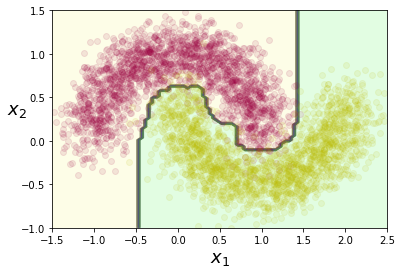

In [52]:
plot_decision_boundary(clf, X_train, y_train, alpha=0.1)
print_results(clf)



### Extra trees

#####
ExtraTreeClassifier.
Train score:  0.9675
Test score:  0.935


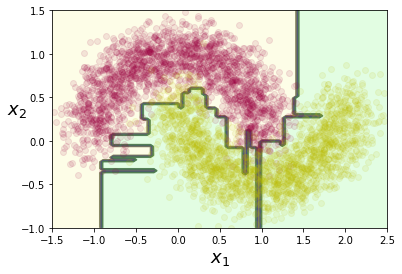

In [53]:
from sklearn.tree import ExtraTreeClassifier

dt = ExtraTreeClassifier(max_depth=12, random_state=107)
dt = dt.fit(X_train, y_train)

# svm_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
#                            ('svc', SVC(kernel='poly'))])
# svm_pipe = svm_pipe.fit(X_train, y_train)

plot_decision_boundary(dt, X_train, y_train, contour=True, alpha=0.1)
print_results(dt)

#####
BaggingClassifier.
Train score:  0.9785
Test score:  0.96


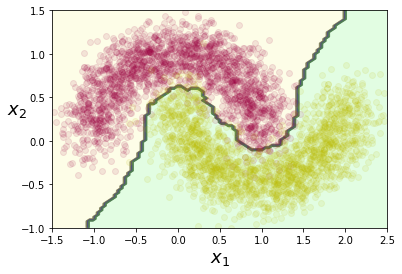

In [54]:
clf = BaggingClassifier(ExtraTreeClassifier(max_depth=12, random_state=107), n_estimators=500, n_jobs=-1, 
                        oob_score=False, max_samples=1000, bootstrap=True)
clf = clf.fit(X_train, y_train)

plot_decision_boundary(clf, X_train, y_train, alpha=0.1)
print_results(clf)

### Bias-Variance

#####
DecisionTreeClassifier.
Train score:  0.83925
Test score:  0.833


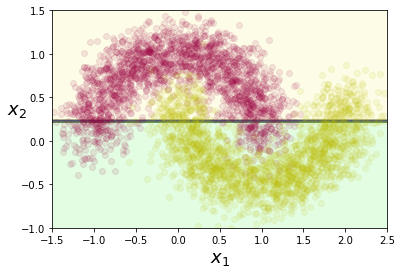

In [55]:
dt = DecisionTreeClassifier(max_depth=1, random_state=107)
dt = dt.fit(X_train, y_train)

# svm_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
#                            ('svc', SVC(kernel='poly'))])
# svm_pipe = svm_pipe.fit(X_train, y_train)

plot_decision_boundary(dt, X_train, y_train, contour=True, alpha=0.1)
print_results(dt)

#####
BaggingClassifier.
Train score:  0.839
Test score:  0.833


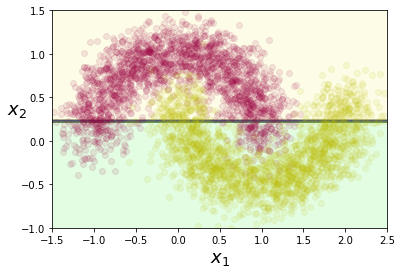

In [56]:
clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=107), n_estimators=500, n_jobs=-1, 
                        oob_score=False, max_samples=1000, bootstrap=True)
clf = clf.fit(X_train, y_train)

plot_decision_boundary(clf, X_train, y_train, alpha=0.1)
print_results(clf)

### Boosting

Para mostrar el poder de boosting, hagamos un nuevo dataset.

In [ ]:
X, y = make_hastie_10_2(random_state=0)

print(X.shape)

X_train, X_test = X[2000:], X[:2000]
y_train, y_test = y[2000:], y[:2000]

Este dataset consiste en diez features normales estándares, con los siguientes labels: 

`y[i] = 1 if np.sum(X[i] ** 2) > 9.34 else -1`

Es decir, es una hiperesfera adentro de una hiperesfera hueca.

In [ ]:
import pandas as pd
import seaborn as sns

dd = pd.DataFrame.from_records(X_train)
dd['target'] = y_train

#ss.pairplot(dd.iloc[::20, :5], hue='target')
#ss.pairplot(dd.iloc[::20], hue='target', vars=range(5), markers=',')
sns.pairplot(dd.iloc[::20], hue='target', vars=range(4), markers='.')


Veamos como funciona `AdaBoost` en un caso así. Combinemos DTs con profundidad máxima 2.

In [ ]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, learning_rate=1.0)

clf.fit(X_train, y_train)
print_results_boost(clf)

In [ ]:
for nesti in [10, 20, 50, 75]:
    clf.set_params(n_estimators=nesti)
    clf.fit(X_train, y_train)
    print_results_boost(clf)

clf.set_params(n_estimators=100)
clf.base_estimator.set_params(max_depth=1)
clf.fit(X_train, y_train)
print_results(clf)

### Stacking

In [57]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('svr', SVR(C=1, gamma=1e-6))]

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))

In [59]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# Y se ajusta como siempre, con la magia de sklearn
reg.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('ridge',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                       cv=None, fit_intercept=True,
                                       gcv_mode=None, normalize=False,
                                       scoring=None, store_cv_values=False)),
                              ('lasso',
                               LassoCV(alphas=None, copy_X=True, cv=None,
                                       eps=0.001, fit_intercept=True,
                                       max_iter=1000, n_alphas=100, n_jobs=None,
                                       normalize=False, positive=False,
                                       precompute='auto', random_s...
                                                            max_depth=3,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
   

In [61]:
reg.score(X_test, y_test)

0.8135378119504807

Y podemos obtener el output de cada uno con el método `transform`.

In [62]:
reg.transform(X_test)

array([[28.78639577, 28.433658  , 22.62294373],
       [35.9633462 , 32.58788457, 23.68491013],
       [14.9718715 , 14.05965525, 16.45282443],
       [25.19918853, 25.54000515, 22.92830073],
       [18.93352627, 19.26508705, 17.0351469 ],
       [23.06721696, 21.97149485, 21.00792038],
       [17.58160097, 17.99436099, 22.44237856],
       [14.28579584, 12.79534729, 20.37899792],
       [22.90490171, 21.85025147, 17.14941968],
       [20.64365431, 21.13312109, 21.27926092],
       [24.66672479, 21.33385274, 22.80361897],
       [18.64211309, 19.87384999, 22.35535278],
       [-7.01493205, -5.92515159, 14.31957398],
       [21.72875281, 20.96654378, 21.25207492],
       [19.2039047 , 21.09039257, 22.75797999],
       [26.26181268, 24.55128723, 17.09977263],
       [20.47817214, 20.27826624, 23.74750739],
       [ 5.63707603,  6.07348742, 16.82768211],
       [40.41153402, 37.89937031, 23.8158787 ],
       [17.68812399, 18.23837257, 17.09624604],
       [27.36028986, 27.7091088 , 24.080

### Multilayer

In [65]:
from sklearn.ensemble import RandomForestRegressor

final_layer = StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                                            ('gbrt', GradientBoostingRegressor(random_state=42))],
                                final_estimator=RidgeCV())

multi_layer_regressor = StackingRegressor(estimators=[('ridge', RidgeCV()),
                                                      ('lasso', LassoCV(random_state=42)),
                                                      ('svr', SVR(C=1, gamma=1e-6, kernel='rbf'))],
                                          final_estimator=final_layer)

multi_layer_regressor.fit(X_train, y_train)
print('R2 score: {:.2f}'.format(multi_layer_regressor.score(X_test, y_test)))

R2 score: 0.82
